# Facial Emotions based music recommendation

***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from skimage.transform import resize
from glob import glob
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub
from tensorflow.keras import Sequential, layers, applications
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from playsound import playsound
from random import choice
import tkinter as tk
from tkinter import filedialog
import joblib
from skimage.filters import gaussian
from skimage.filters import unsharp_mask

In [2]:
angry = glob('Training/0/*.jpg')
# disgust = glob('Training/1/*.jpg')
fear = glob('Training/2/*.jpg')
happy = glob('Training/3/*.jpg')
neutral = glob('Training/4/*.jpg')
sad = glob('Training/5/*.jpg')
surprise = glob('Training/6/*.jpg')

In [3]:
# emotions = {0:'angry',1:'disgust',2:'fear',3:'happy',4:'neutral',5:'sad',6:'surprise'}
emotions = {0:'angry',1:'fear',2:'happy',3:'neutral',4:'sad',5:'surprise'}

In [4]:
images = []
labels = []

for i in angry:
    img = plt.imread(i)
    images.append(img)
    labels.append(0)
    
# for i in disgust:
#     img = plt.imread(i)
#     images.append(img)
#     labels.append(1)
    
for i in fear:
    img = plt.imread(i)
    images.append(img)
    labels.append(1)
    
for i in happy:
    img = plt.imread(i)
    images.append(img)
    labels.append(2)
    
for i in neutral:
    img = plt.imread(i)
    images.append(img)
    labels.append(3)
    
for i in sad:
    img = plt.imread(i)
    images.append(img)
    labels.append(4)
    
for i in surprise:
    img = plt.imread(i)
    images.append(img)
    labels.append(5)

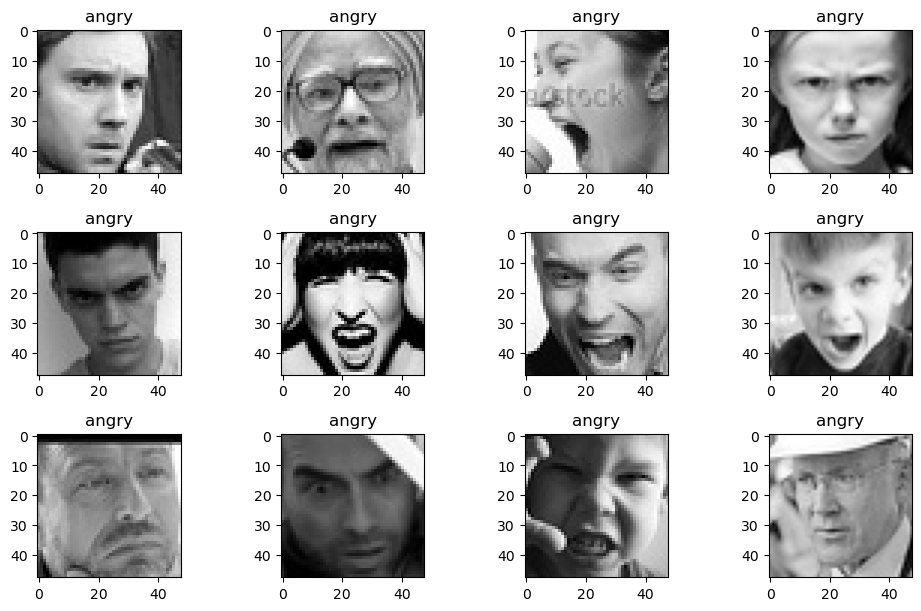

In [5]:
plt.figure(figsize = (10,8))
for i in range(12):
    plt.subplot(4,4,i+1)
    plt.imshow(images[i], cmap = 'gray')
    plt.title(emotions[labels[i]])
plt.tight_layout()

In [6]:
images,labels = shuffle(images,labels)

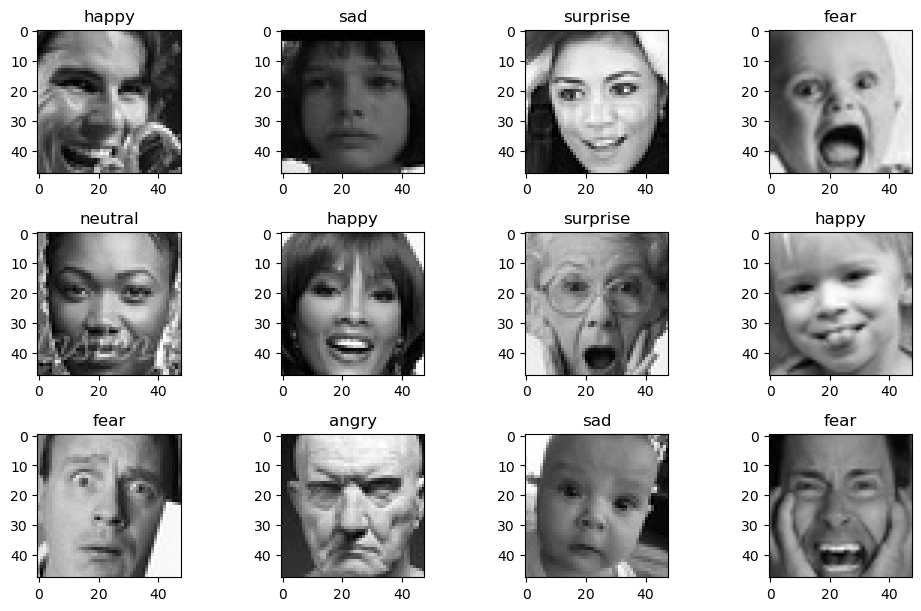

In [7]:
plt.figure(figsize = (10,8))
for i in range(12):
    plt.subplot(4,4,i+1)
    plt.imshow(images[i], cmap = 'gray')
    plt.title(emotions[labels[i]])
plt.tight_layout()

In [8]:
X = []

for i in images:
    X.append(resize(i, (224,224,3)))

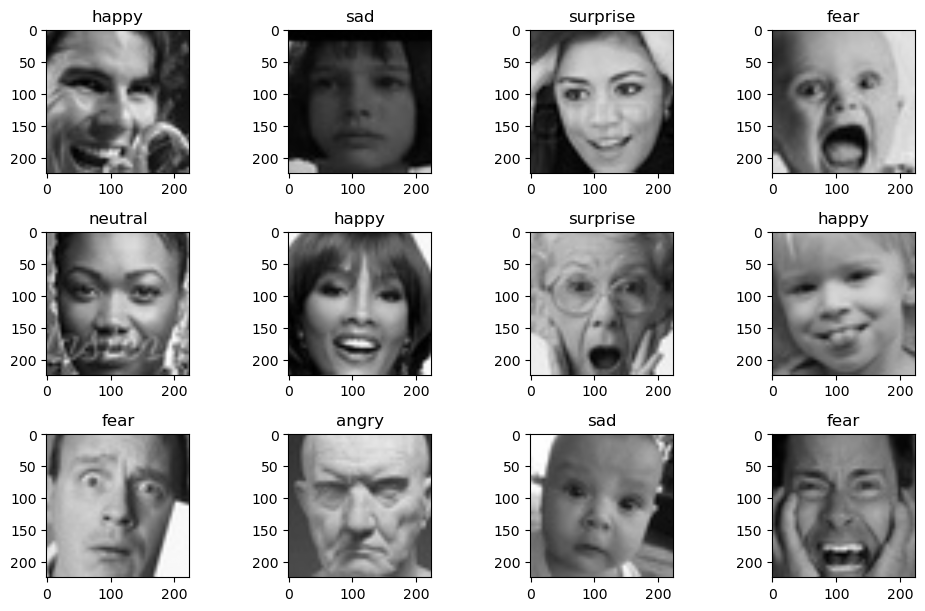

In [9]:
plt.figure(figsize = (10,8))
for i in range(12):
    plt.subplot(4,4,i+1)
    plt.imshow(X[i], cmap = 'gray')
    plt.title(emotions[labels[i]])
plt.tight_layout()

In [10]:
X = np.array(X)
y = np.array(labels)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 100)

In [12]:
feature_extractor_model = "https://tfhub.dev/tensorflow/efficientnet/lite0/feature-vector/2"

In [10]:
hub.load(feature_extractor_model)

In [13]:
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape = (224,224,3), trainable = False
)

In [14]:
num_of_classes = 6

In [16]:
model = Sequential([
    pretrained_model_without_top_layer,
    layers.Dense(64, activation = 'relu'),
    layers.Dropout(0.1),
    
    layers.Dense(14, activation = 'relu'),
    layers.Dense(num_of_classes, activation = 'softmax')
])

In [17]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [18]:
model.fit(X_train, y_train, epochs = 50, validation_split = 0.05)

Epoch 1/50
108/108 [==============================] - 97s 845ms/step - loss: 1.7278 - accuracy: 0.2636 - val_loss: 1.5869 - val_accuracy: 0.3591
Epoch 2/50
108/108 [==============================] - 89s 820ms/step - loss: 1.5536 - accuracy: 0.3545 - val_loss: 1.4430 - val_accuracy: 0.3867
Epoch 3/50
108/108 [==============================] - 89s 827ms/step - loss: 1.4645 - accuracy: 0.4303 - val_loss: 1.4068 - val_accuracy: 0.4309
Epoch 4/50
108/108 [==============================] - 88s 817ms/step - loss: 1.3860 - accuracy: 0.4603 - val_loss: 1.3840 - val_accuracy: 0.4530
Epoch 5/50
108/108 [==============================] - 89s 828ms/step - loss: 1.3312 - accuracy: 0.4708 - val_loss: 1.4242 - val_accuracy: 0.4365
Epoch 6/50
108/108 [==============================] - 88s 816ms/step - loss: 1.2760 - accuracy: 0.5096 - val_loss: 1.3860 - val_accuracy: 0.4696
Epoch 7/50
108/108 [==============================] - 87s 810ms/step - loss: 1.1953 - accuracy: 0.5560 - val_loss: 1.3619 - val_ac

In [19]:
y_pred = model.predict(X_test)

29/29 [==============================] - 23s 751ms/step


In [20]:
y_pred = [np.argmax(i) for i in y_pred]

In [21]:
accuracy_score(y_test,y_pred)

0.4053156146179402

<AxesSubplot:>

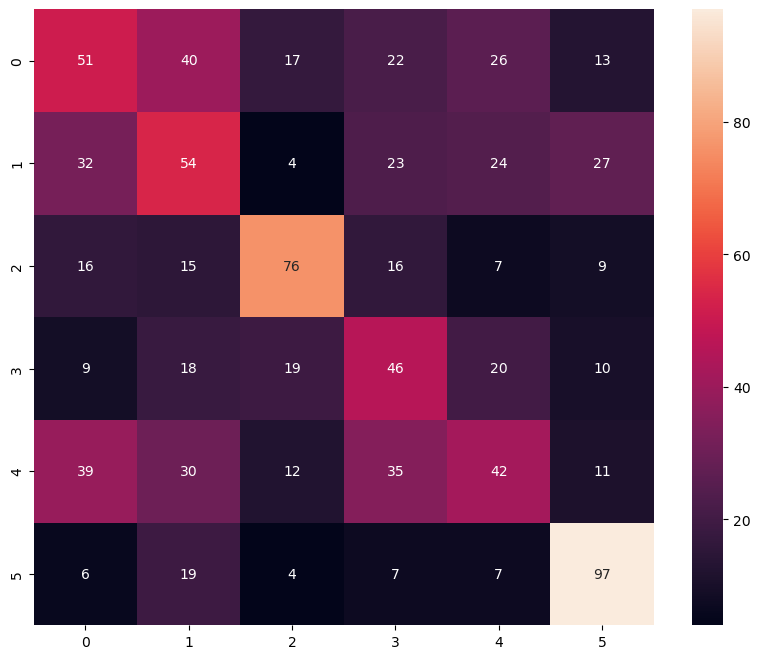

In [22]:
plt.figure(figsize = (10,8))
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True)

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.33      0.30      0.32       169
           1       0.31      0.33      0.32       164
           2       0.58      0.55      0.56       139
           3       0.31      0.38      0.34       122
           4       0.33      0.25      0.28       169
           5       0.58      0.69      0.63       140

    accuracy                           0.41       903
   macro avg       0.41      0.42      0.41       903
weighted avg       0.40      0.41      0.40       903



### Blurred Images

In [24]:
angry_new = glob('New Set/0/*.jpg')
# disgust_new = glob('New Set/1/*.jpg')
fear_new = glob('New Set/2/*.jpg')
happy_new = glob('New Set/3/*.jpg')
neutral_new = glob('New Set/4/*.jpg')
sad_new = glob('New Set/5/*.jpg')
surprise_new = glob('New Set/6/*.jpg')

In [25]:
images_new = []
labels_new = []

for i in angry_new:
    img = plt.imread(i)
    images_new.append(img)
    labels_new.append(0)
    
# for i in disgust_new:
#     img = plt.imread(i)
#     images_new.append(img)
#     labels_new.append(1)
    
for i in fear_new:
    img = plt.imread(i)
    images_new.append(img)
    labels_new.append(1)
    
for i in happy_new:
    img = plt.imread(i)
    images_new.append(img)
    labels_new.append(2)
    
for i in neutral_new:
    img = plt.imread(i)
    images_new.append(img)
    labels_new.append(3)
    
for i in sad_new:
    img = plt.imread(i)
    images_new.append(img)
    labels_new.append(4)
    
for i in surprise_new:
    img = plt.imread(i)
    images_new.append(img)
    labels_new.append(5)

In [26]:
images_new, labels_new = shuffle(images_new, labels_new)

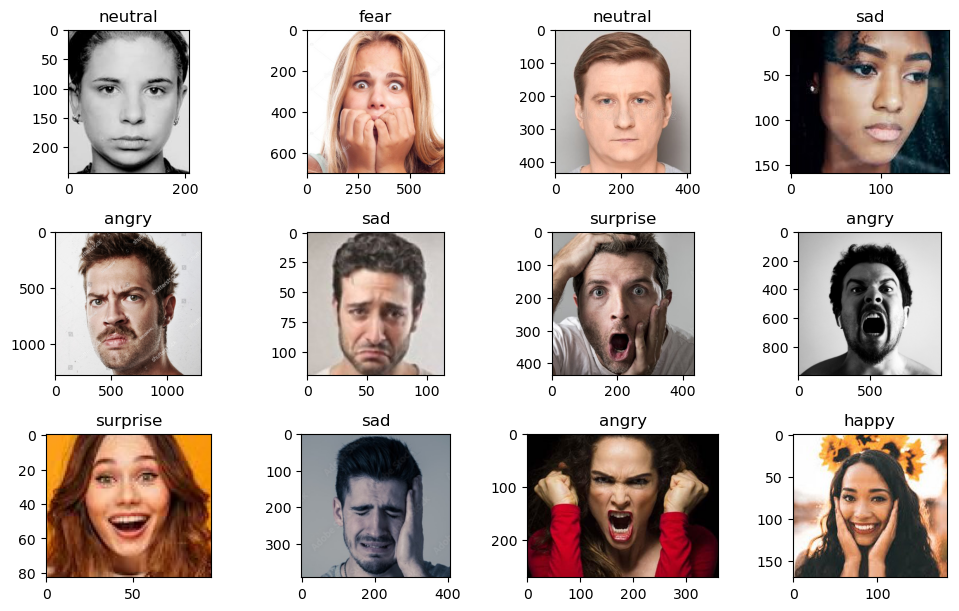

In [27]:
plt.figure(figsize = (10,8))
for i in range(12):
    plt.subplot(4,4,i+1)
    plt.imshow(images_new[i], cmap = 'gray')
    plt.title(emotions[labels_new[i]])
plt.tight_layout()

In [28]:
import cv2
images_new_gray = []

for i in images_new:
    i = cv2.cvtColor(i, cv2.COLOR_RGB2GRAY)
    images_new_gray.append(i)

In [29]:
X_new = []

for i in images_new_gray:
    X_new.append(resize(i, (224,224,3)))

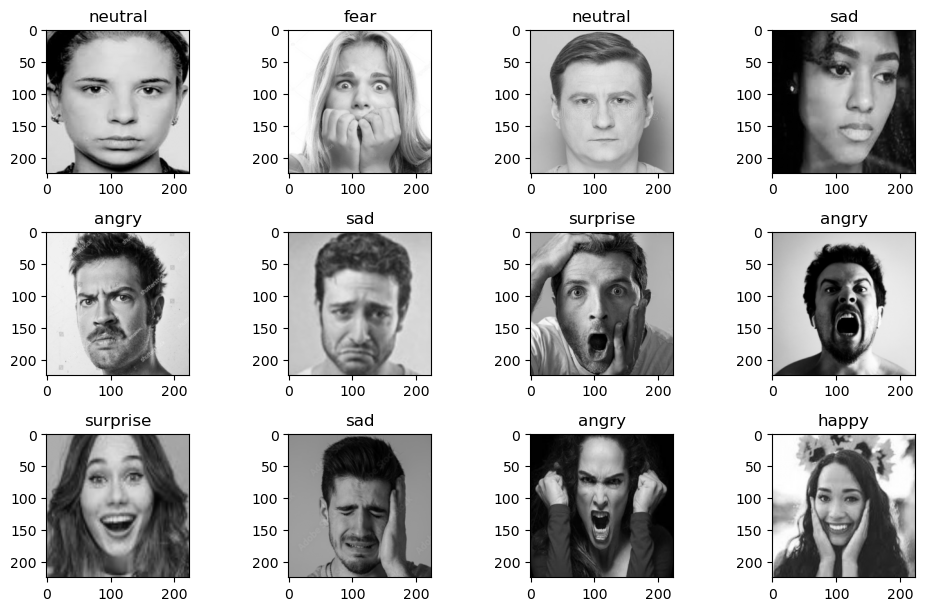

In [30]:
plt.figure(figsize = (10,8))
for i in range(12):
    plt.subplot(4,4,i+1)
    plt.imshow(X_new[i], cmap = 'gray')
    plt.title(emotions[labels_new[i]])
plt.tight_layout()

In [31]:
X_test_blurred = []

sigma = 2.0

for image in X_new:
# apply Gaussian blur, creating a new image
    blurred_image = gaussian(
        image, sigma=(sigma, sigma), truncate=3.5, channel_axis=2)
    X_test_blurred.append(blurred_image)

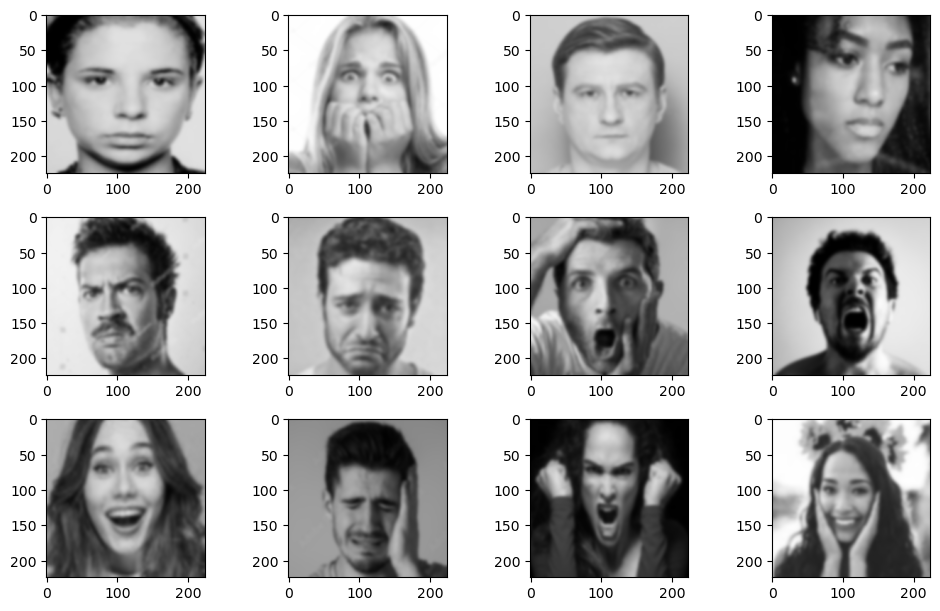

In [32]:
plt.figure(figsize = (10,8))
for i in range(12):
    plt.subplot(4,4,i+1)
    plt.imshow(X_test_blurred[i], cmap = 'gray')
plt.tight_layout()

In [33]:
blurred_prediction = model.predict(np.array(X_test_blurred))

2/2 [==============================] - 1s 192ms/step


In [34]:
y_pred_blurred = [np.argmax(i) for i in blurred_prediction]

In [35]:
accuracy_score(labels_new,y_pred_blurred)

0.4594594594594595

<AxesSubplot:>

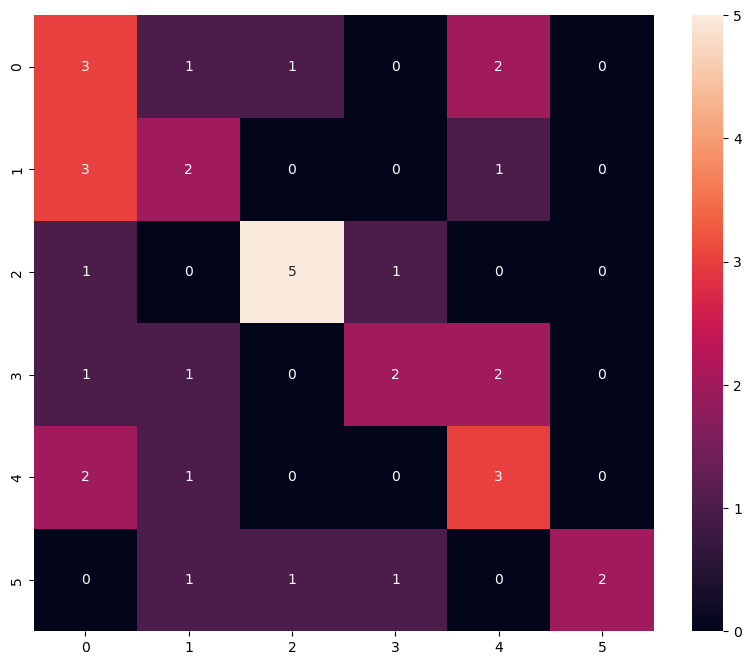

In [36]:
plt.figure(figsize = (10,8))
sns.heatmap(confusion_matrix(labels_new,y_pred_blurred), annot = True)

In [37]:
print(classification_report(labels_new,y_pred_blurred))

              precision    recall  f1-score   support

           0       0.30      0.43      0.35         7
           1       0.33      0.33      0.33         6
           2       0.71      0.71      0.71         7
           3       0.50      0.33      0.40         6
           4       0.38      0.50      0.43         6
           5       1.00      0.40      0.57         5

    accuracy                           0.46        37
   macro avg       0.54      0.45      0.47        37
weighted avg       0.52      0.46      0.47        37



### Sharped image prediction with Skimage unsharp mask

In [38]:
sharpened_images = []


for i in X_test_blurred:
    image = unsharp_mask(i, radius = 5, amount=3.9)
    sharpened_images.append(image)

C:\Users\vishn\anaconda3\lib\site-packages\skimage\_shared\utils.py:348: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  return func(*args, **kwargs)


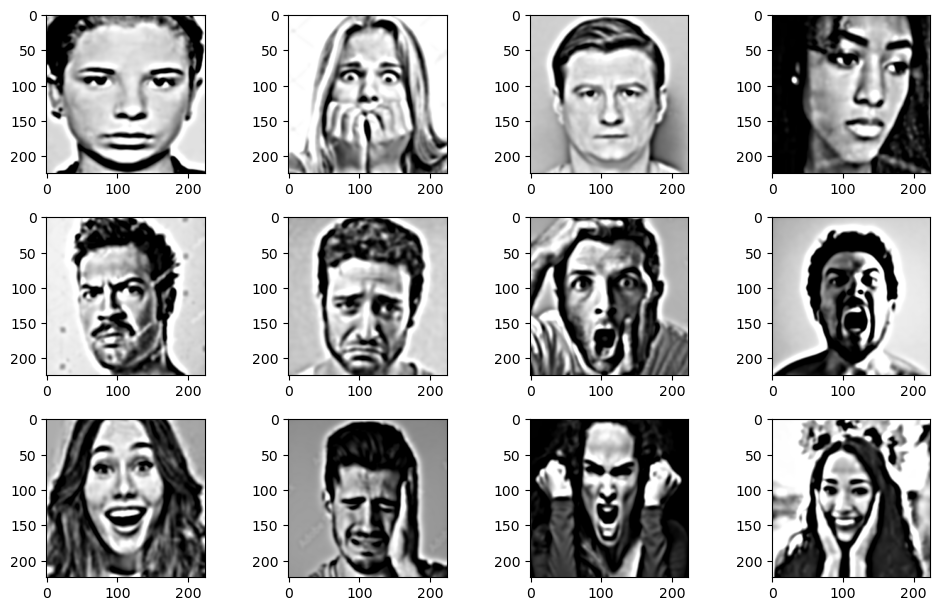

In [39]:
plt.figure(figsize = (10,8))
for i in range(12):
    plt.subplot(4,4,i+1)
    plt.imshow(sharpened_images[i], cmap = 'gray')
plt.tight_layout()

In [40]:
y_pred_sharpened = model.predict(np.array(sharpened_images))

2/2 [==============================] - 1s 155ms/step


In [41]:
y_pred_sharpened = [np.argmax(i) for i in y_pred_sharpened]

In [42]:
accuracy_score(labels_new,y_pred_sharpened)

0.5135135135135135

<AxesSubplot:>

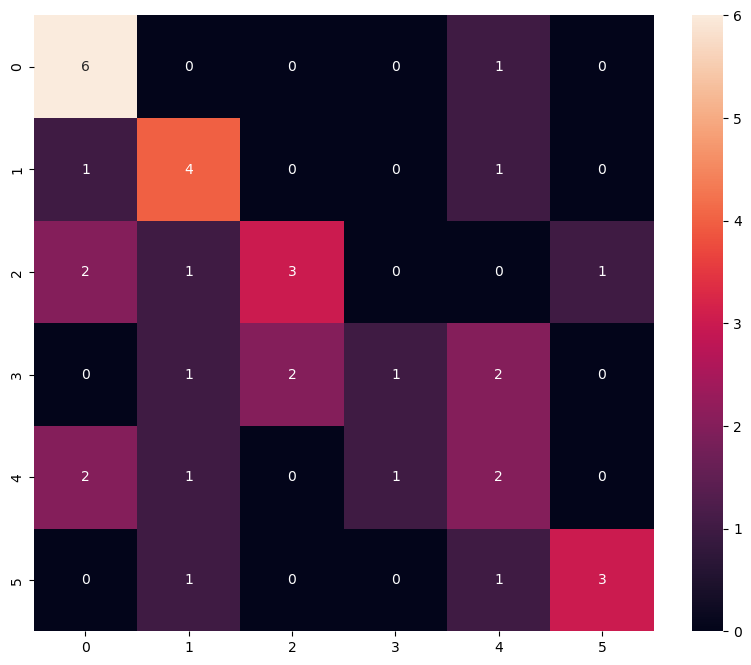

In [43]:
plt.figure(figsize = (10,8))
sns.heatmap(confusion_matrix(labels_new,y_pred_sharpened), annot = True)

In [44]:
print(classification_report(labels_new,y_pred_sharpened))

              precision    recall  f1-score   support

           0       0.55      0.86      0.67         7
           1       0.50      0.67      0.57         6
           2       0.60      0.43      0.50         7
           3       0.50      0.17      0.25         6
           4       0.29      0.33      0.31         6
           5       0.75      0.60      0.67         5

    accuracy                           0.51        37
   macro avg       0.53      0.51      0.49        37
weighted avg       0.53      0.51      0.49        37



***

In [45]:
music0 = glob('Music/0/*.mp3')
music1 = glob('Music/1/*.mp3')
music2 = glob('Music/2/*.mp3')
music3 = glob('Music/3/*.mp3')
music4 = glob('Music/4/*.mp3')
music5 = glob('Music/5/*.mp3')
music6 = glob('Music/6/*.mp3')

In [46]:
def recommend_music():
    root = tk.Tk()
    root.withdraw()

    file_path = filedialog.askopenfilename(filetypes = (("jpg files","*.jpg"),("all files","*.*")))

    img = plt.imread(file_path)
    img = resize(img, (224,224,3))


    prediction = model.predict(img.reshape(1,224,224,3))[0]
    prediction = np.argmax(prediction)
    
    if prediction == 0:
        music = choice(music0)
        playsound(music)
        print(f"Now Playing {music}")
        stop = input('Click Enter to Stop')
    elif prediction == 1:
        music = choice(music1)
        playsound(music)
        print(f"Now Playing {music}")
        stop = input('Click Enter to Stop')
    elif prediction == 2:
        music = choice(music2)
        playsound(music)
        print(f"Now Playing {music}")
        stop = input('Click Enter to Stop')
        p.stop()
    elif prediction == 3:
        music = choice(music3)
        playsound(music)
        print(f"Now Playing {music}")
        stop = input('Click Enter to Stop')
    elif prediction == 4:
        music = choice(music4)
        playsound(music)
        print(f"Now Playing {music}")
        stop = input('Click Enter to Stop')
    elif prediction == 5:
        music = choice(music5)
        playsound(music)
        print(f"Now Playing {music}")
        stop = input('Click Enter to Stop')
    elif prediction == 6:
        music = choice(music6)
        playsound(music)
        print(f"Now Playing {music}")
        stop = input('Click Enter to Stop')

In [ ]:
recommend_music()

***

<b>Require help with your AI/ML/DL Project? You can connect me:
    
* Mail: vishnu.data.ai@gmail.com
* LinkedIn: https://www.linkedin.com/in/vishnu-viswanath-mm/
* GitHub: https://github.com/vishnuvizs
* Medium: https://medium.com/@vishnu-viswanath-mm </b>

# <center><a style= "color:lightblue;" href = "https://www.linkedin.com/in/vishnu-viswanath-mm/">VISHNU VISWANATH</a></center>